In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('DATA/cancer_classification.csv')

In [3]:
df.info()
#to see if there are any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


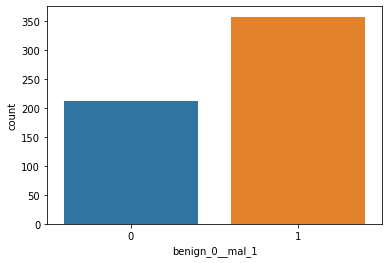

In [9]:
sns.countplot(x='benign_0__mal_1',data=df);

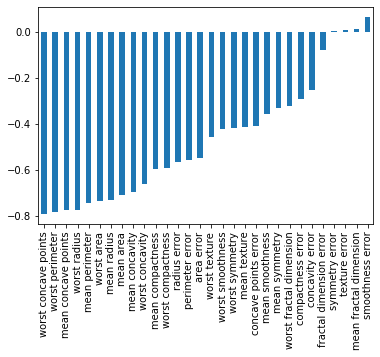

In [16]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar');

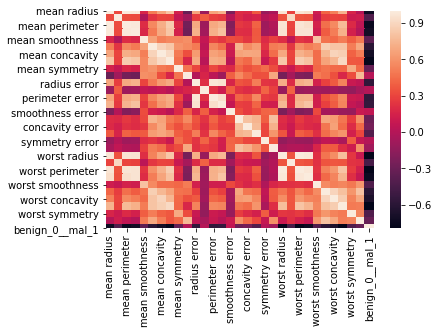

In [18]:
sns.heatmap(df.corr());

In [83]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=101)

In [85]:
from sklearn.preprocessing import MinMaxScaler

In [86]:
scaler = MinMaxScaler()

In [87]:
X_train = scaler.fit_transform(X_train)

In [88]:
X_test = scaler.transform(X_test)

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [90]:
X_train.shape

(426, 30)

In [91]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#last layer of binary model uses sigmoid
model.add(Dense(1,activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [92]:
model.fit(x=X_train, y=y_train, epochs = 600, 
          validation_data=(X_test, y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 913us/sample - loss: 0.6806 - val_loss: 0.6657
Epoch 2/600
426/426 [==============================] - 0s 50us/sample - loss: 0.6452 - val_loss: 0.6325
Epoch 3/600
426/426 [==============================] - 0s 65us/sample - loss: 0.6039 - val_loss: 0.5863
Epoch 4/600
426/426 [==============================] - 0s 57us/sample - loss: 0.5559 - val_loss: 0.5354
Epoch 5/600
426/426 [==============================] - 0s 53us/sample - loss: 0.5050 - val_loss: 0.4804
Epoch 6/600
426/426 [==============================] - 0s 54us/sample - loss: 0.4538 - val_loss: 0.4221
Epoch 7/600
426/426 [==============================] - 0s 53us/sample - loss: 0.3973 - val_loss: 0.3688
Epoch 8/600
426/426 [==============================] - 0s 49us/sample - loss: 0.3557 - val_loss: 0.3303
Epoch 9/600
426/426 [==============================] - 0s 49us/sample - loss: 0.3174 - val_loss: 0.2903
Epoch 10/600
426/

In [93]:
losses = pd.DataFrame(model.history.history)

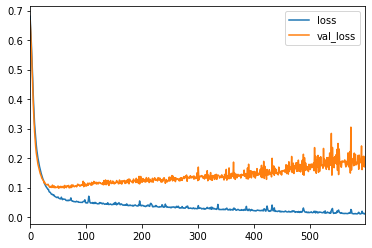

In [94]:
losses.plot();
#there's overfitting, so we're training for too many epochs

In [95]:
#stop training before validation loss increases using EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored quantity has stopped improving.
 |  
 |  Arguments:
 |      monitor: Quantity to be monitored.
 |      min_delta: Minimum change in the monitored quantity
 |          to qualify as an improvement, i.e. an absolute
 |          change of less than min_delta, will count as no
 |          improvement.
 |      patience: Number of epochs with no improvement
 |          after which training will be stopped.
 |      verbose: verbosity mode.
 |      mode: One of `{"auto", "min", "max"}`. In `min` mode,
 |          training will stop when the quantity
 |          monitored has stopped decreasing; in `max`
 |          mode it will stop when the quantity
 |          monitored has stopped increasing; in `auto`
 |          mode, t

In [100]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#last layer of binary model uses sigmoid
model.add(Dense(1,activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [101]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',
                           verbose=1,patience=25)

In [102]:
model.fit(x=X_train, y=y_train, epochs = 600, 
          validation_data=(X_test, y_test),
         callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 1ms/sample - loss: 0.6615 - val_loss: 0.6434
Epoch 2/600
426/426 [==============================] - 0s 53us/sample - loss: 0.6180 - val_loss: 0.5983
Epoch 3/600
426/426 [==============================] - 0s 62us/sample - loss: 0.5690 - val_loss: 0.5470
Epoch 4/600
426/426 [==============================] - 0s 43us/sample - loss: 0.5187 - val_loss: 0.4932
Epoch 5/600
426/426 [==============================] - 0s 49us/sample - loss: 0.4649 - val_loss: 0.4381
Epoch 6/600
426/426 [==============================] - 0s 48us/sample - loss: 0.4145 - val_loss: 0.3862
Epoch 7/600
426/426 [==============================] - 0s 40us/sample - loss: 0.3648 - val_loss: 0.3330
Epoch 8/600
426/426 [==============================] - 0s 45us/sample - loss: 0.3191 - val_loss: 0.2922
Epoch 9/600
426/426 [==============================] - 0s 46us/sample - loss: 0.2884 - val_loss: 0.2600
Epoch 10/600
426/42

In [103]:
model_loss = pd.DataFrame(model.history.history)

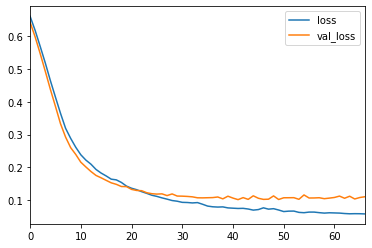

In [104]:
model_loss.plot()

In [106]:
#another way to prevent overfitting is to do dropout layers

In [109]:
from tensorflow.keras.layers import Dropout

In [110]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(rate=0.5)) #rate is the percentage of neurons that are being turned off randomly

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

#last layer of binary model uses sigmoid
model.add(Dense(1,activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [111]:
model.fit(X_train, y_train, epochs = 600, 
          validation_data=(X_test, y_test),
         callbacks=[early_stop])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.6838 - val_loss: 0.6785
Epoch 2/600
426/426 [==============================] - 0s 57us/sample - loss: 0.6728 - val_loss: 0.6637
Epoch 3/600
426/426 [==============================] - 0s 67us/sample - loss: 0.6629 - val_loss: 0.6510
Epoch 4/600
426/426 [==============================] - 0s 52us/sample - loss: 0.6538 - val_loss: 0.6354
Epoch 5/600
426/426 [==============================] - 0s 61us/sample - loss: 0.6364 - val_loss: 0.6157
Epoch 6/600
426/426 [==============================] - 0s 68us/sample - loss: 0.6215 - val_loss: 0.5904
Epoch 7/600
426/426 [==============================] - 0s 54us/sample - loss: 0.6032 - val_loss: 0.5683
Epoch 8/600
426/426 [==============================] - 0s 59us/sample - loss: 0.5885 - val_loss: 0.5399
Epoch 9/

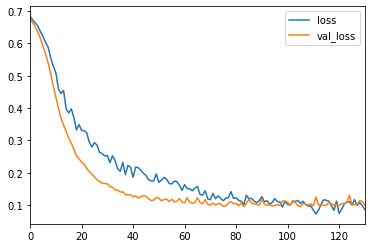

In [113]:
model_loss = pd.DataFrame(model.history.history).plot()

In [122]:
predictions = model.predict_classes(X_test)
predictions

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [115]:
from sklearn.metrics import classification_report, confusion_matrix
#the two reports important for classificaiton problems

In [123]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [124]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 2 86]]
